### **LINEAR REGRESSION**
    Advantages: 
        1. Very Simple To Implement.
        2. Performs well on Linear data.

    Disadvantages: 
        1. Not suitable for data which is non-linear relationship.
        2. Underfittng Issue.
        3. Sensitive to Outliers

BUILDING A LINEAR REGRESSION MODEL

In [34]:
# Importing the lhe libraries: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [35]:
class Linear_Regression():
    
    def __init__(self, no_of_iteration, learning_rate):
        self.no_of_iteration = no_of_iteration
        self.learning_rate = learning_rate
    
    # Fit function to train the model:     
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.m, self.n = x.shape
        self.w = np.zeros(self.n)
        self.b = 0
        
        for i in range(self.no_of_iteration):
            self.update_weights()
        
    def update_weights(self):
        y_prediction = self.predict(self.x)
        
        # calculate the gradience : 
        dw = -(2*(self.x.T).dot(self.y-y_prediction))//self.m
        db = -2*np.sum(self.y-y_prediction)//self.m
        
        # Updating the weights :
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
    
    def predict(self,x):
        return x.dot(self.w)+ self.b
    

In [36]:
# loading the data_set
salary_data = pd.read_csv(r"C:\Users\Subham Pathak\Desktop\ML\JUPYTER\DATA_SETS\salary_data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Splittng the data into x and y

In [37]:
x = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 2)

TRAINING THE LINEAR REGRESSION MODEL

In [49]:
model = Linear_Regression( learning_rate = 0.02, no_of_iteration = 5000)
model.fit(x_train, y_train)

# Printing the weight and bias 
print(f"Weight is {model.w[0]} \n Bias is {model.b}")

Weight is 9532.879999999894 
 Bias is 23750.68000000016


In [40]:
# Predicting the data

final_prediction = model.predict(x_test)
print(final_prediction)

[ 36143.424  34236.848  66648.64   59022.336  91434.128  80947.96
 101920.296  52349.32   42816.44 ]


VISUALISING THE PREDICTION VALUES AND ACTUAL VALUES:

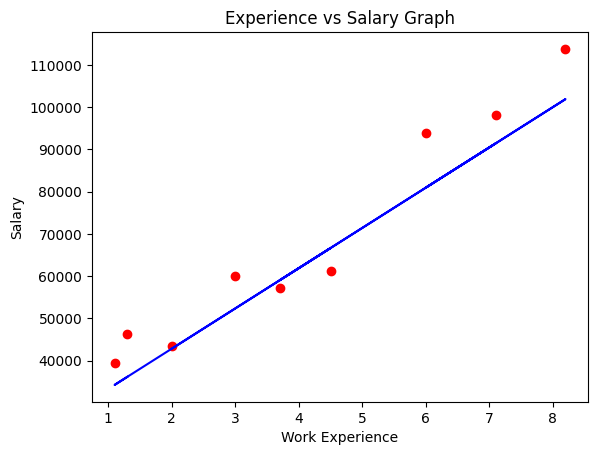

In [50]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, final_prediction, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title("Experience vs Salary Graph")
plt.show()